In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Check null value

In [5]:
round(df.isnull().mean(),2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.20
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin          0.77
Embarked       0.00
dtype: float64

Three colum have missing value. out of 891 , cabin having 687. So we can't drop the row

In [6]:
import numpy as np

In [10]:
df['cabin_null'] = np.where(df.Cabin.isnull(),1,0)

In [12]:
# Check percentage with service colum
round(df.groupby(['Survived'])['cabin_null'].mean(),2)

Survived
0    0.88
1    0.60
Name: cabin_null, dtype: float64

#### All techniques for handling missing value
1. Mean/Mediam/mode
- Random Sample
- Capture NaN value with a new feature
- End of distribution imputation
- Arbitrary imputation
- Fequency imputation

## Mean/Median/Mode imputation

In [14]:
df = pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
# % of missing value
round(df.isnull().mean(),3)

Survived    0.000
Age         0.199
Fare        0.000
dtype: float64

In [17]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)

In [18]:
median = df.Age.median()
median

28.0

In [19]:
impute_nan(df,'Age',median)
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

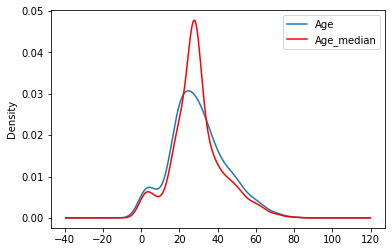

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

change variance after apply median imputaion

## Random Sampling Imputation

In [23]:
# Nan Count
df.Age.isnull().sum()

177

In [29]:
# Take smaple to fill na
df.Age.dropna().sample(df.Age.isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [32]:
def imputate_sample(df,variable):
    df[variable+'_random'] = df[variable]
    #random sample
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [33]:
imputate_sample(df,'Age')

In [36]:
df[df.Age.isnull()]

,Survived,Age,Fare,Age_median,Age_random
5,0,NaN,8.4583,28.0,28.00
17,1,NaN,13.0000,28.0,50.00
19,1,NaN,7.2250,28.0,0.92
26,0,NaN,7.2250,28.0,36.00
28,1,NaN,7.8792,28.0,26.00
...,...,...,...,...,...
859,0,NaN,7.2292,28.0,22.00
863,0,NaN,69.5500,28.0,25.00
868,0,NaN,9.5000,28.0,15.00
878,0,NaN,7.8958,28.0,34.00


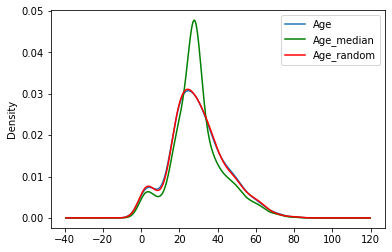

In [38]:
fig = plt.figure()
ax = fig.add_subplot()
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='green')
df['Age_random'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

1. Easy to implement
2. There is no distortion in variance

## Capture NaN value with a new feature

In [39]:
import numpy as np

In [40]:
df['Age_NaN'] = np.where(df.Age.isnull(),1,0)
df.head(20)

,Survived,Age,Fare,Age_median,Age_random,Age_NaN
0,0,22.0,7.2500,22.0,22.00,0
1,1,38.0,71.2833,38.0,38.00,0
2,1,26.0,7.9250,26.0,26.00,0
3,1,35.0,53.1000,35.0,35.00,0
4,0,35.0,8.0500,35.0,35.00,0
5,0,NaN,8.4583,28.0,28.00,1
6,0,54.0,51.8625,54.0,54.00,0
7,0,2.0,21.0750,2.0,2.00,0
8,1,27.0,11.1333,27.0,27.00,0
9,1,14.0,30.0708,14.0,14.00,0


In [41]:
import seaborn as sns


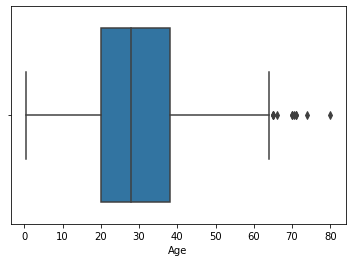

In [42]:
# check outlier
sns.boxplot('Age',data=df)

In [48]:
# Calculating 3 std deviation
extreme = round(df.Age.mean()+3*df.Age.std(),1)
extreme

73.3

In [45]:
def impute_with_std(df,variable,extreme):
    df[variable+'_end_distibution'] = df[variable].fillna(extreme)
    

In [49]:
impute_with_std(df,'Age',extreme)

In [50]:
df

,Survived,Age,Fare,Age_median,Age_random,Age_NaN,Age_end_distibution
0,0,22.0,7.2500,22.0,22.0,0,22.0
1,1,38.0,71.2833,38.0,38.0,0,38.0
2,1,26.0,7.9250,26.0,26.0,0,26.0
3,1,35.0,53.1000,35.0,35.0,0,35.0
4,0,35.0,8.0500,35.0,35.0,0,35.0
...,...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0,0,27.0
887,1,19.0,30.0000,19.0,19.0,0,19.0
888,0,NaN,23.4500,28.0,15.0,1,73.3
889,1,26.0,30.0000,26.0,26.0,0,26.0


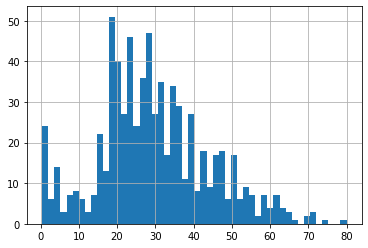

In [55]:
df.Age.hist(bins=50)

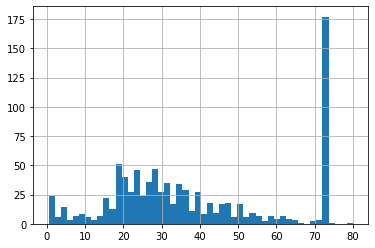

In [56]:
df.Age_end_distibution.hist(bins=50)

## Frequency Category imputation

In [58]:
loan = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
loan

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [59]:
# Null Count
loan.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [62]:
# Null %
round(loan.isnull().mean(),3)

BsmtQual       0.025
FireplaceQu    0.473
GarageType     0.055
SalePrice      0.000
dtype: float64

## Compute with frequency (mode) with feature

In [67]:
loan.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

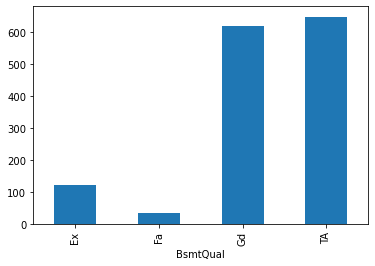

In [68]:
loan.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

`More Frequent Category is TA`

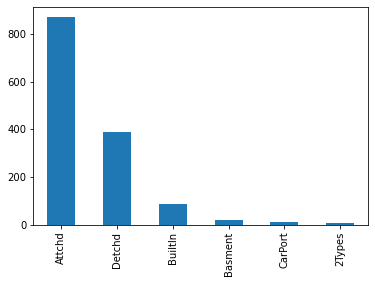

In [72]:
loan.GarageType.value_counts().plot.bar()

`Most frequent category is 'Attchd' for GarageType`

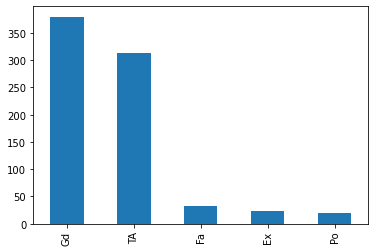

In [74]:
loan.FireplaceQu.value_counts().plot.bar()

In [79]:
def impute_nan_with_frq(df,variable):
    most_frequent = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent,inplace=True)

In [80]:
for feature in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
    impute_nan_with_frq(loan,feature)

In [83]:
loan.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

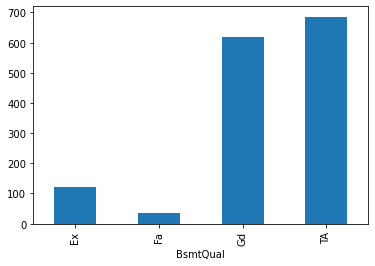

In [89]:
loan.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

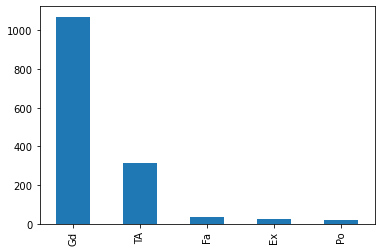

In [90]:
loan.FireplaceQu.value_counts().plot.bar()

`Idealy don't use this for heigher missing value. It will bais with most frequent category`. Check both bar for FireplaceQu

## Replcae nan with new category

Replace all nan with new category, so modal will not bais with frequent one

In [84]:
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [85]:
def impute_nan(df,variable):
    df[variable] = np.where(df[variable].isnull(),'Missing',df[variable])

In [86]:
for feature in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
    impute_nan(df,feature)

In [87]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Missing,Attchd,142125


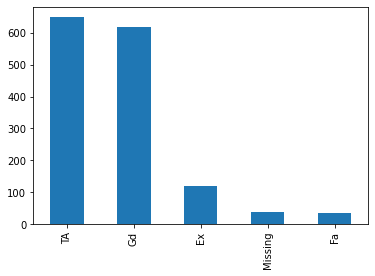

In [88]:
df.BsmtQual.value_counts().plot.bar()

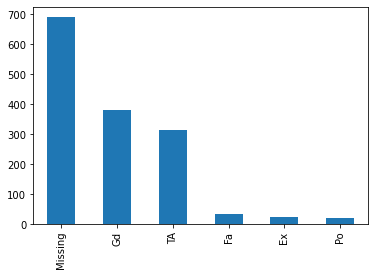

In [91]:
df.FireplaceQu.value_counts().plot.bar()